# STOCK PREDICTION AI 
## Author:D.Vamsi krishnam raju
## Date:26-11-2021
## Program :
### This Ai will predict closing price and of stock of a company using 100 and 200 days moving average using machine learning.
###  We will create RNN, STACKED LSTM (Long short term memory model) model to predict closing price of a stock. 

# LICENSE AND COPYRIGHTS
MIT License

Copyright (c) 2021 D.Vamsi krishnam raju

Permission is here by granted to  person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software  including with limitation the rights to use.

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# 1.Visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
start = '2010-01-01'
end = '2019-12-31'
df = pd.read_csv('APPL_STOCK.csv')
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [3]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2512,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027306
2513,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416672
2514,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389580
2515,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813286
2516,2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337982


In [4]:
df = df.reset_index()
df.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
1,1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
4,4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [5]:
df = df.drop(columns=['Date' , 'Adj Close'],axis=1)
df.head()


,index,High,Low,Open,Close,Volume
0,0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,4,7.571429,7.466071,7.562500,7.520714,477131200.0


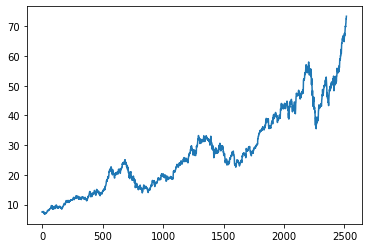

In [6]:
plt.plot(df.Close)

In [7]:
df


,index,High,Low,Open,Close,Volume
0,0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...,...
2512,2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

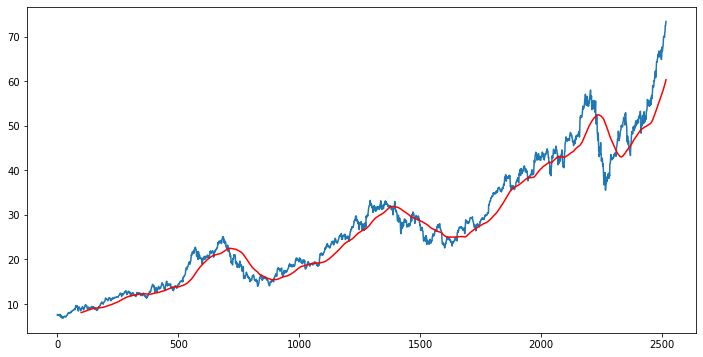

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

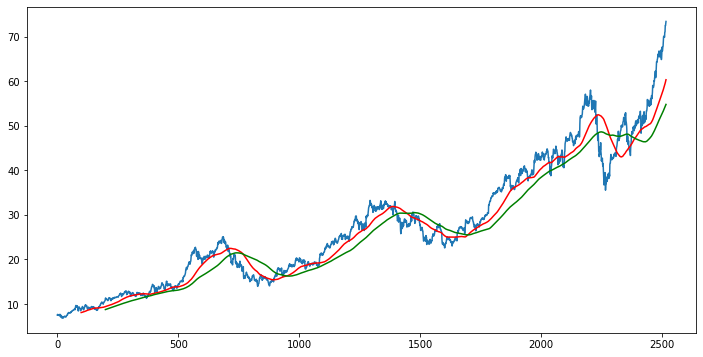

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [12]:
df.shape


(2517, 6)

# Spliting Data into Training and Testing


In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing)

(1761, 1)
          Close
1761  29.182501
1762  28.955000
1763  29.037500
1764  29.004999
1765  29.152500
...         ...
2512  71.067497
2513  72.477501
2514  72.449997
2515  72.879997
2516  73.412498

[756 rows x 1 columns]


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [16]:
from sklearn.preprocessing import MinMaxScaler
Scalar = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = Scalar.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
data_training_array.shape

(1761, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
x_train , y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1661, 100, 1)

# LSTM Model(Long short term memory)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model =Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences =True , input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences =True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences =True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

# model compilation or load model which you made before


### I'm loading my model which i allready made it before.
### Optimizer which is used in this model is "adam".Use the below code to compile model.Make sure that you must have a good GPU in your local system.
#### model.compile(optimizer='adam', loss='mean_squared_error')
#### model.fit(x_train, y_train, epochs=50)



In [ ]:

model.load_weights('stock_price_prediction.h5')

In [ ]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [ ]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [ ]:
input_data = Scalar.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [ ]:
input_data.shape

(856, 1)

In [ ]:
x_test = []
y_test =[]
 
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


# Make Predictions using our lstm model 

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [ ]:
y_predict

array([[0.12799014],
       [0.12864438],
       [0.12925959],
       [0.12981142],
       [0.13028967],
       [0.13068724],
       [0.13100983],
       [0.13128446],
       [0.13155185],
       [0.13184375],
       [0.13219036],
       [0.13259925],
       [0.1330617 ],
       [0.13357578],
       [0.13413262],
       [0.13471614],
       [0.13531157],
       [0.13590495],
       [0.13648331],
       [0.13706243],
       [0.13765529],
       [0.13826875],
       [0.13889784],
       [0.13954501],
       [0.14031191],
       [0.14127368],
       [0.14248477],
       [0.14398387],
       [0.14579192],
       [0.14785866],
       [0.15012176],
       [0.15257066],
       [0.15517445],
       [0.1578988 ],
       [0.16074985],
       [0.16371411],
       [0.16677572],
       [0.16992168],
       [0.17312886],
       [0.17636263],
       [0.17958754],
       [0.18276241],
       [0.18588348],
       [0.18895888],
       [0.19199601],
       [0.19499192],
       [0.19793372],
       [0.200

In [ ]:
Scalar.scale_

array([0.02099517])

In [ ]:
scale_factor =1/0.02099517
y_predict = y_predict*scale_factor
y_test = y_test*scale_factor

# Visualising the original price and predected price

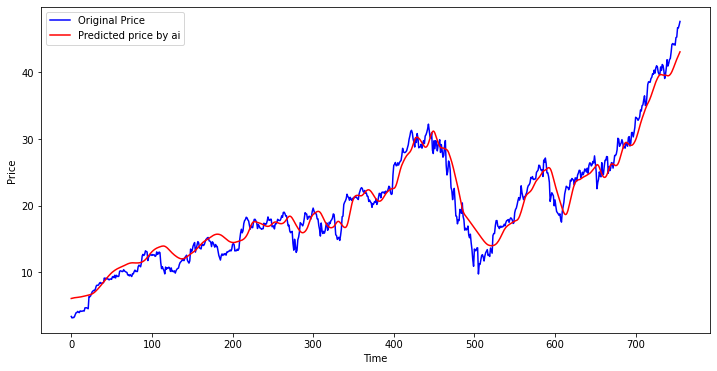

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')
plt.plot(y_predict, 'r' , label = 'Predicted price by ai')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()